# Chapter 07 - Exercises

### Exercise 7.1

**Q**

In Chapter 6 we noted that the Monte Carlo error can be written as the sum of TD errors (6.6) if the value estimates don’t change from step to step. Show that the n-step error used in (7.2) can also be written as a sum TD errors (again if the value estimates don’t change) generalizing the earlier result.

**A**

The TD error is defined as:

\begin{align*}
\delta_t \doteq R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
\end{align*}

Equation 6.6 is:

\begin{align*}
G_t - V(S_t) &= R_{t+1} + \gamma G_{t+1} - V(S_t) + \gamma V(S_{t+1}) - \gamma V(S_{t+1}) \\
&= \delta_t + \gamma (G_{t+1} - V(S_{t+1})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V(S_{t+2})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (G_T - V(S_T)) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (0 - 0) \\
&= \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k
\end{align*}

Equation 7.2 is:

\begin{align*}
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha[G_{t:t+n} - V_{t+n-1} (S_t)], \quad 0 \leq t \lt T
\end{align*}

with:

\begin{align*}
G_{t:t+n} \doteq R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1} (S_{t+n})
\end{align*}

The n-step TD error in 7.2 is the expression whose difference is multiplied by $\alpha$ to be added to the old value and give the new (estimated) state value:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t) &= R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1} (S_{t+n}) - V_{t+n-1} (S_t) \\
&= R_{t+1} + \gamma [R_{t+2} + ... + \gamma^{n-2} R_{t+n} + \gamma^{n-1} V_{t+n-1} (S_{t+n})] - V_{t+n-1} (S_t) \\
&= R_{t+1} + \gamma G_{t+1:t+n} - V_{t+n-1} (S_t) \\
&= R_{t+1} + \gamma [G_{t+1:t+n} + V_{t+n-1} (S_{t+1}) - V_{t+n-1} (S_{t+1})] - V_{t+n-1} (S_t) \\
&= [R_{t+1} + \gamma V_{t+n-1} (S_{t+1}) - V_{t+n-1} (S_t)] + \gamma [G_{t+1:t+n} - V_{t+n-1} (S_{t+1})]
\end{align*}

Assuming that the value estimates don’t change, we have:

\begin{align*}
V_k = V, \quad \forall k
\end{align*}

and:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t) = G_{t:t+n} - V (S_t)
\end{align*}

So:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t) &= [R_{t+1} + \gamma V_{t+n-1} (S_{t+1}) - V_{t+n-1} (S_t)] + \gamma [G_{t+1:t+n} - V_{t+n-1} (S_{t+1})] \\
G_{t:t+n} - V (S_t) &= [R_{t+1} + \gamma V (S_{t+1}) - V (S_t)] + \gamma [G_{t+1:t+n} - V (S_{t+1})] \\
&= \delta_t + \gamma [G_{t+1:t+n} - V (S_{t+1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 [G_{t+2:t+n} - V (S_{t+2})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} [G_{t+n-1:t+n} - V (S_{t+n-1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} [R_{t+n} + \gamma V_{t+n-1} (S_{t+n}) - V (S_{t+n-1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} [R_{t+n} + \gamma V(S_{t+n}) - V (S_{t+n-1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} \delta_{t+n-1} \\
&= \sum_{k=t}^{t+n-1} \gamma^{k-t} \delta_k
\end{align*}

It's good to take into account that for a final time-step T, the equation corresponds to the Monte Carlo error (t + n = T):

\begin{align*}
G_{t:t+n} - V (S_t) &= \sum_{k=t}^{t+n-1} \gamma^{k-t} \delta_k \\
G_{t:T} - V (S_t) &= \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k
\end{align*}

It's also importante to note that the value estimates were considered to not change, but in a real scenario it's expected that they change (see exercise 6.1).

### Exercise 7.2 (programming) 

**Q**

With an n-step method, the value estimates do change from step to step, so an algorithm that used the sum of TD errors (see previous exercise) in place of the error in (7.2) would actually be a slightly different algorithm. Would it be a better algorithm or a worse one? Devise and program a small experiment to answer this question empirically.

**A**

The error of n-step TD is:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t)
\end{align*}

The update of n-step TD is:

\begin{align*}
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha[G_{t:t+n} - V_{t+n-1} (S_t)], \quad 0 \leq t \lt T
\end{align*}

Using the sum of TD errors in place of the error, the update would be:

\begin{align*}
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha \left[\sum_{k=t}^{t+n-1} \gamma^{k-t} \delta_k \right], \quad 0 \leq t \lt T
\end{align*}

For the small expirement it will be used the random walk experiment and compare the state values across the epochs for the 2 cases, considering the sum of the absolute differences between each state value and the optimal state value. The policy does not matter because it's an MRP, so there's no actions to be taken (for the sake of implementation, it can also be considered to have only one action).

In [1]:
import typing
import numpy as np
from numpy.random import MT19937, Generator

def random_generator(seed: int | None = None):
    bg = MT19937(seed)
    rg = Generator(bg)
    return rg

class BaseEnv():
    def __init__(
        self,
        states: list[int],
        actions: list[int],
        terminal_states: set[int] = set(),
    ):
        num_states = len(states)
        num_actions = len(actions)

        assert num_states > 0
        assert num_actions > 0

        self.states = states
        self.actions = actions
        self.num_states = num_states
        self.num_actions = num_actions
        self.terminal_states = terminal_states

    def reset(self, seed: int | None) -> int:
        raise NotImplementedError()

    def step(self, action: int) -> tuple[int, float, bool, bool]:
        raise NotImplementedError()

def n_step_td_eval(
    env: BaseEnv,
    v: list[float],
    policy: typing.Callable[[int], int],
    n: int,
    alpha=0.5,
    gamma=0.9,
    seed: int | None = None,
    sum_td_errors=False,
):
    s_steps = [0] * (n+1)
    r_steps = [0] * (n+1)

    state = env.reset(seed)
    s_steps[0] = state
    T: int | None = None
    t = 0
    tau: int | None = None

    def delta(k: int):
        return r_steps[(k+1) % (n+1)] + gamma*v[s_steps[(k+1) % (n+1)]] - v[s_steps[k % (n+1)]]

    while T is None or tau is None or tau < T-1:
        if T is None or t < T:
            action = policy(state)
            next_state, reward, terminated, truncated = env.step(action)
            r_steps[(t+1) % (n+1)] = reward
            s_steps[(t+1) % (n+1)] = next_state
            done = terminated or truncated
            if done:
                T = t + 1
            state = next_state

        tau = t - n + 1

        if tau >= 0:
            if sum_td_errors:
                max_time_step = (min(tau+n-1, T) if T is not None else (tau+n-1))
                error = sum([(gamma**(k-tau))*delta(k) for k in range(tau, max_time_step + 1)])
            else:
                max_time_step = (min(tau+n, T) if T is not None else (tau+n))
                G = sum([(gamma**(i-tau-1))*r_steps[i % (n+1)] for i in range(tau+1, max_time_step + 1)])
                if T is None or tau + n < T:
                    G += (gamma**n)*v[s_steps[(tau+n) % (n+1)]]
                error = G - v[s_steps[tau % (n+1)]]

            v[s_steps[tau % (n+1)]] += alpha * error

        t += 1

    return v

def evaluate(
    env: BaseEnv,
    optimal_v: list[float],
    policy: typing.Callable[[int], int],
    n: int,
    episodes: int,
    alpha=0.5,
    gamma=0.9,
    seed: int | None = None,
    sum_td_errors=False,
):
    v = [0.0] * env.num_states
    diffs: list[float] = []
    rg = random_generator(seed)

    for _ in range(episodes):
        inner_seed = rg.integers(1e9)
        v = n_step_td_eval(
            env=env,
            v=v,
            policy=policy,
            n=n,
            alpha=alpha,
            gamma=gamma,
            seed=inner_seed,
            sum_td_errors=sum_td_errors,
        )
        diff = sum(abs(v[i] - optimal_v[i]) for i in range(len(v)))
        diffs.append(diff)

    return diffs, v

class RandomWalkEnv(BaseEnv):
    def __init__(
        self,
        max_steps: int | None = None,
    ):
        states = list(range(7))
        actions = [0] # there's no action (or equivalently, only 1 action)

        super().__init__(
            states=states,
            actions=actions,
            terminal_states=set([0, len(states) - 1])
        )

        self.max_steps = max_steps
        self.steps = 0
        self.state: int | None = None
        self.rg = random_generator()

    def reset(self, seed: int | None) -> int:
        state = 3
        self.steps = 0
        self.state = state
        self.rg = random_generator(seed)
        return state

    def step(self, action: int) -> tuple[int, float, bool, bool]:
        max_steps = self.max_steps
        steps = self.steps
        state = self.state
        assert state is not None
        assert steps < max_steps

        steps += 1
        next_state = state + self.rg.choice([1, -1])
        reward = 1 if next_state == self.num_states - 1 else 0
        terminated = next_state in self.terminal_states
        truncated = (not terminated) and (max_steps is not None) and (steps >= max_steps)

        self.steps = steps
        self.state = next_state

        return next_state, reward, terminated, truncated

In [4]:
import matplotlib.pyplot as plt

def evaluate_random_walk(n: int):
    env = RandomWalkEnv(max_steps=500)
    optimal_v = [0] + [i/6 for i in range(1, 6)] + [0]
    episodes = 1000
    alpha = 0.1
    gamma = 1
    seed = 0

    diffs_n_step_error, v_n_step_error = evaluate(
        env=env,
        optimal_v=optimal_v,
        policy=lambda state: 0,
        n=n,
        episodes=episodes,
        alpha=alpha,
        gamma=gamma,
        seed=seed,
        sum_td_errors=False,
    )

    diffs_sum_error_td, v_sum_error_td = evaluate(
        env=env,
        optimal_v=optimal_v,
        policy=lambda state: 0,
        n=n,
        episodes=episodes,
        alpha=alpha,
        gamma=gamma,
        seed=seed,
        sum_td_errors=True,
    )

    print(f'[n={n}] v_n_step_error={v_n_step_error}')
    print(f'[n={n}] v_sum_error_td={v_sum_error_td}')
    print('-' * 80)

    plt.figure()
    plt.plot(diffs_n_step_error, label='n-step error')
    plt.plot(diffs_sum_error_td, label='sum td error')
    plt.title(f'Algorithms Comparation (n={n})')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()

[n=1] v_n_step_error=[0.0, 0.09606064397966346, 0.23196155234651913, 0.41108588795101875, 0.5825442025054338, 0.8591292439848166, 0.0]
[n=1] v_sum_error_td=[0.0, 0.09606064397966346, 0.23196155234651913, 0.41108588795101875, 0.5825442025054338, 0.8591292439848166, 0.0]
--------------------------------------------------------------------------------
[n=2] v_n_step_error=[0.0, 0.1276515216511967, 0.22911767948799897, 0.38754363294577737, 0.5784667612566161, 0.8434494794214904, 0.0]
[n=2] v_sum_error_td=[0.0, 0.43533849007491365, 0.22911767948799897, 0.7901501794189734, 0.5784667612566161, 1.4480682156987446, 0.0]
--------------------------------------------------------------------------------
[n=3] v_n_step_error=[0.0, 0.14186945839105403, 0.2171960323064127, 0.3655830567879677, 0.5830441006763988, 0.8314278991649181, 0.0]
[n=3] v_sum_error_td=[0.0, 0.8412673324123207, 0.9314917381603918, 0.8377937503929285, 1.290806744208228, 1.7179026079281952, 0.0]
------------------------------------

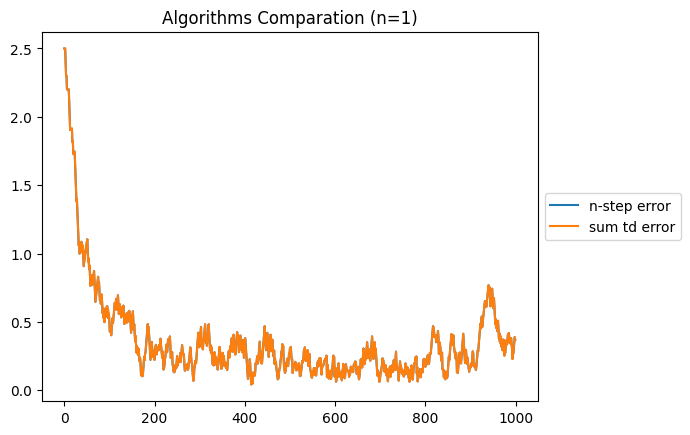

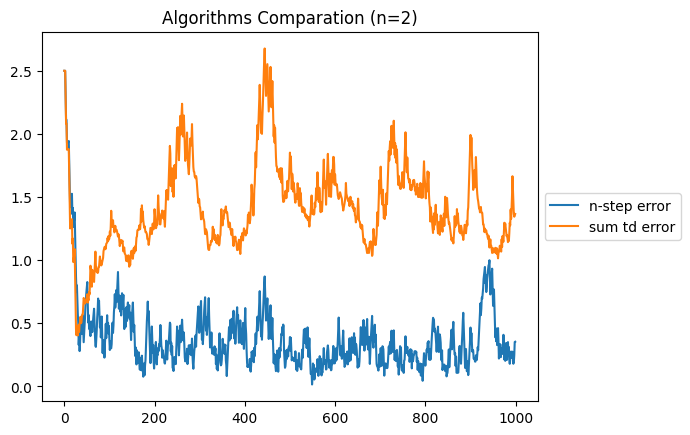

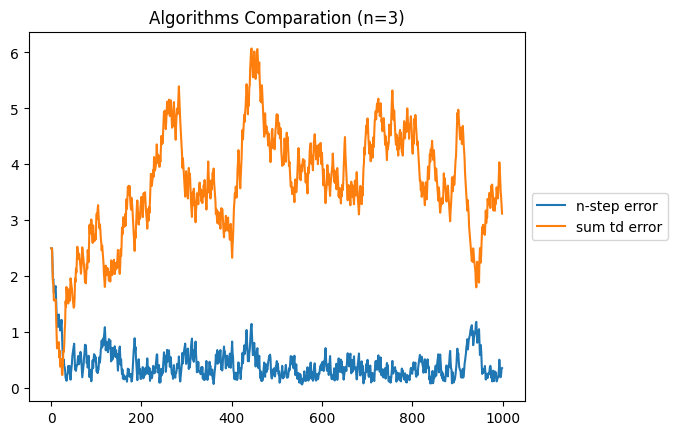

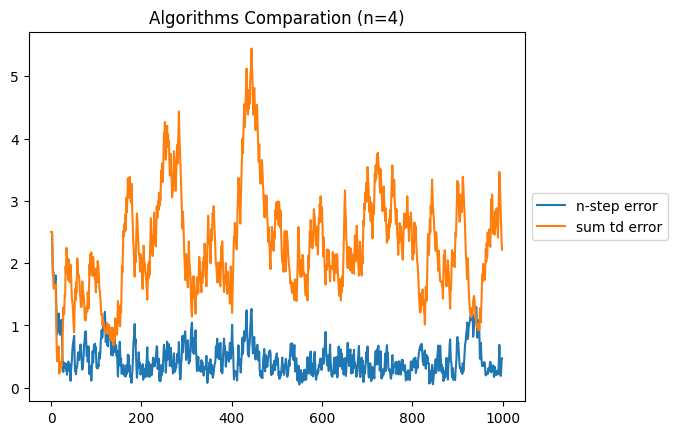

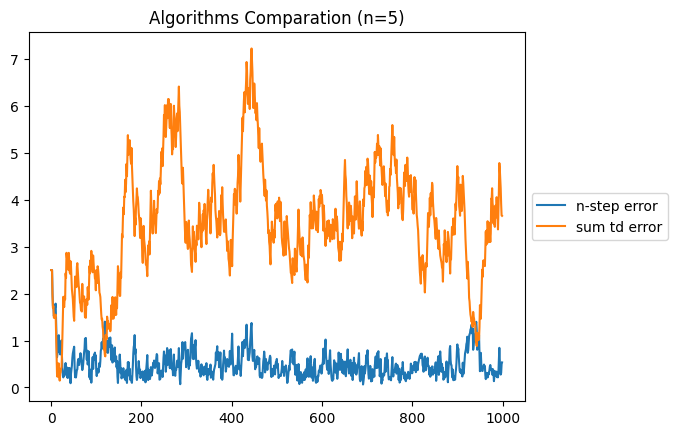

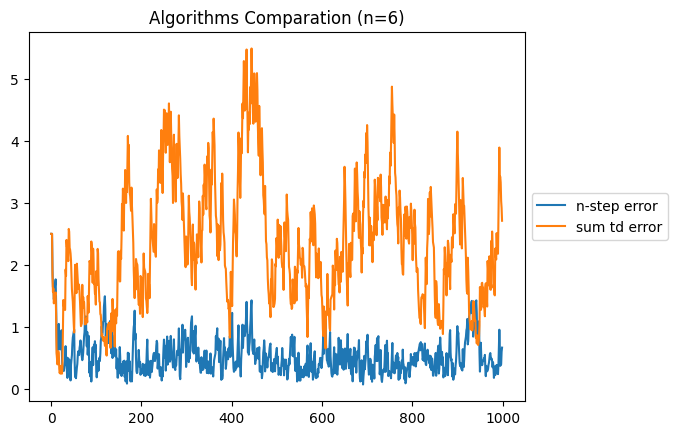

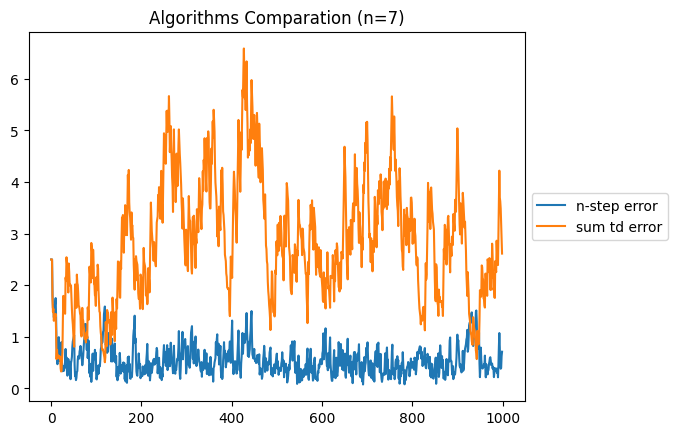

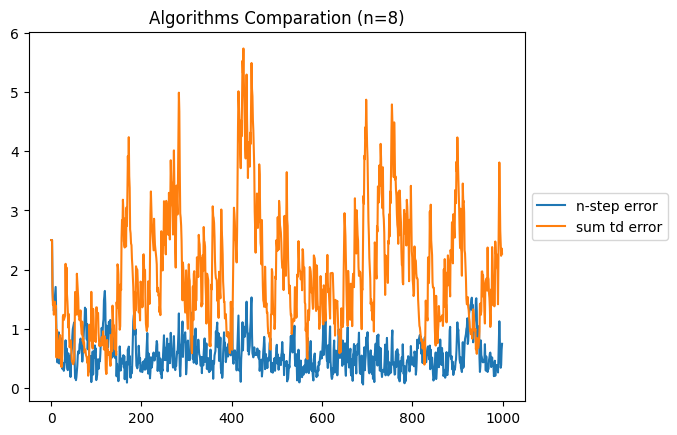

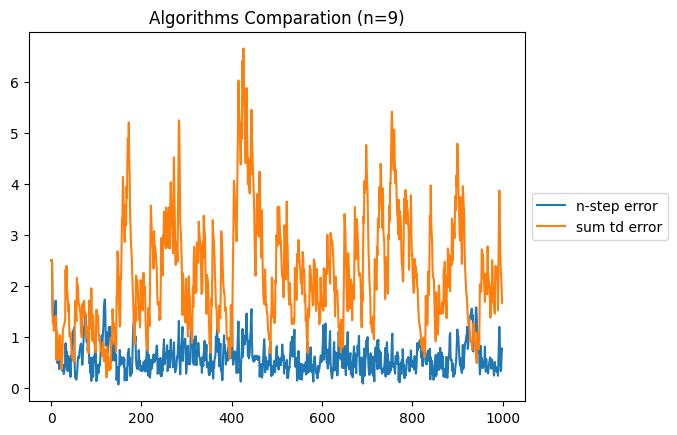

In [5]:
for n in range(1, 10):
    evaluate_random_walk(n)

As can be seen in the graphs (the closer to 0, the better), for $n = 1$ both cases are equally good (the difference between the predicted values after 1000 episodes and the optimal/expected values is the same after each episode, using the same seeds for both). For $n \gt 1$, the default n-step error is better, with the sum of the TD errors to define the n-step error giving a greater variance in the results.